In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.2 MB/s eta 0:00:00


In [6]:
# Import necessary libraries
from google.colab import drive
from transformers import TFRobertaModel, RobertaTokenizer
import tensorflow as tf
import joblib

In [7]:
# Mount Google Drive to access the saved model
drive.mount('/content/drive')

# Load the tokenizer from Drive
tokenizer_path = '/content/drive/MyDrive/tokenizer.joblib'
tokenizer = joblib.load(tokenizer_path)

# Load the model from Drive
model_path = '/content/drive/MyDrive/mymodel.h5'
model = tf.keras.models.load_model(model_path, custom_objects={'TFRobertaModel': TFRobertaModel})


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

def classify_question(question):
    
    encoded_question = tokenizer.encode_plus(
        question,
        max_length=256,
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_token_type_ids=False,
        return_tensors='tf'
    )
    input_ids = encoded_question['input_ids']
    attn_mask = encoded_question['attention_mask']
    
    # Make predictions and return the predicted class name
    prediction = model.predict([input_ids, attn_mask])#testcase: model used
    predicted_class_num = tf.argmax(prediction, axis=1).numpy()[0]
    
    # Map the class number to the class name
    
    class_names = ["Knowledge", "Comprehension", "Application", "Analysis", "Synthesis", "Evaluation"]
    predicted_class_name = class_names[predicted_class_num]
    
    if question=="" or question.isspace():
      return("Please enter a valid question!!")

    else:
      return(predicted_class_name)
  
    






In [19]:
#Code after optimization
from collections import Counter
tm=int(input("Enter total marks:"))
tt=int(input("Enter total time for attempting the question paper in minutes:"))
rem_marks=tm
rem_time=tt
marks=0
difficulty=[]
level=[]
while rem_marks>0:
    ques=input("Enter your question:")
    level_name = classify_question(ques)
    time=int(input("Enter estimated time to attempt this question:"))
    if(time>rem_time):
      print("Time exceeded!! Remaining time limit: ",rem_time)
      continue
    else:
      marks=int(input("Enter marks of question:"))
      if(marks>rem_marks):
        print("Marks exceeded!! Remaining marks limit: ",rem_marks)
        continue
      else:
        rem_time-=time
        diff=input("Enter difficulty level:")
        difficulty.append(diff)
        level.append(level_name)
        rem_marks-=marks
        print(f"The level of the question is: {level_name}")

c1=Counter(difficulty)
c2=Counter(level)


Enter total marks:10
Enter total time for attempting the question paper in minutes:10
Enter your question:what is code optimization?
1/1 [==============================] - 1s 1s/step
Enter estimated time to attempt this question:2
Enter marks of question:1
Enter difficulty level:easy
The level of the question is: Knowledge
Enter your question:differenciate between code refactoring and optimization?
1/1 [==============================] - 1s 826ms/step
Enter estimated time to attempt this question:3
Enter marks of question:4
Enter difficulty level:medium
The level of the question is: Analysis
Enter your question:Design an activity diagram for given problem.
1/1 [==============================] - 1s 836ms/step
Enter estimated time to attempt this question:3
Enter marks of question:5
Enter difficulty level:hard
The level of the question is: Synthesis


                                          QUESTION PAPER ANALYSIS REPORT                                     
--------------*------------------*------------------*----------------*---------------*-------------------*---------------------*------------*--------------*---------------
Extra Time remaining in minutes: 2
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Level wise analysis of Question Paper


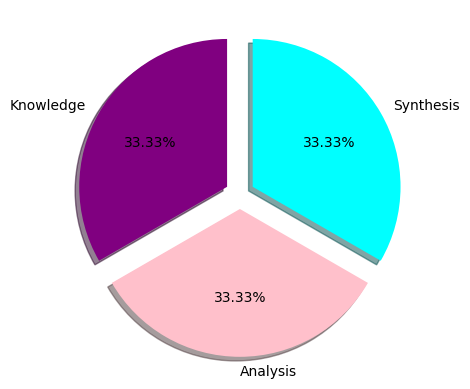

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Difficulty wise analysis of Question Paper


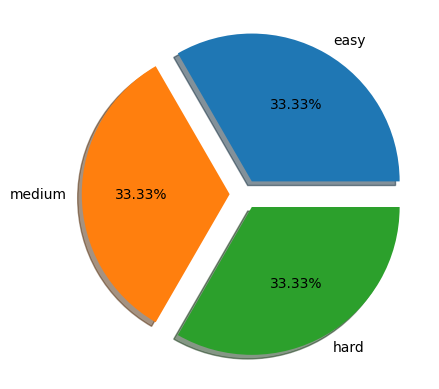

In [34]:
import matplotlib.pyplot as plt
print("                                          QUESTION PAPER ANALYSIS REPORT                                     ")
print("--------------*------------------*------------------*----------------*---------------*-------------------*---------------------*------------*--------------*---------------")
length=len(c2)
print("Extra Time remaining in minutes:",rem_time)
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
colors=['purple', 'pink', 'cyan']
ques_values =list(c2.values() ) 
ques_levels=list(c2.keys())
plt.pie(ques_values,labels=ques_levels,colors=colors, startangle=90, shadow=True,explode=(0.1,)*length, autopct='%1.2f%%')
print("Level wise analysis of Question Paper")
plt.show()
print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
diff_values =list(c1.values() ) 
difficulty_levels=list(c1.keys())
plt.pie(diff_values,labels=difficulty_levels,shadow=True,explode=(0.1,)*length, autopct='%1.2f%%')
print("Difficulty wise analysis of Question Paper")
plt.show()
